<a href="https://colab.research.google.com/github/Tae1Yuk/ML-Study/blob/main/Chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Chapter 7-1**

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) =\
keras.datasets.fashion_mnist.load_data()

In [ ]:
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


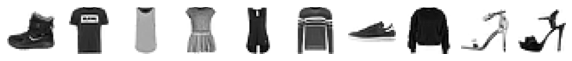

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize = (10, 10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap = 'gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss = 'log', max_iter = 5, random_state = 42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs = -1)
print(np.mean(scores['test_score']))

0.8195666666666668


In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [ ]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 784) (48000,)
(12000, 784) (12000,)


In [ ]:
dense = keras.layers.Dense(10, activation = 'softmax', input_shape = (784,))

In [ ]:
model = keras.Sequential(dense)

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


In [ ]:
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.6054 - accuracy: 0.7955
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4781 - accuracy: 0.8396
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4562 - accuracy: 0.8478
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4440 - accuracy: 0.8518
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4367 - accuracy: 0.8544


In [ ]:
model.evaluate(val_scaeld, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4641 - accuracy: 0.8467


[0.46414700150489807, 0.846666693687439]

## **Chapter 7-2**

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28 * 28)
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [ ]:
dense1 = keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,))
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential([
keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,), name ='hidden'),
keras.layers.Dense(10, activation = 'softmax', name = 'output')
], name = '패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation = 'sigmoid', input_shape = (784,)))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 8s 3ms/step - loss: 0.5617 - accuracy: 0.8101
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4066 - accuracy: 0.8539
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3729 - accuracy: 0.8649
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3494 - accuracy: 0.8735
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3338 - accuracy: 0.8789


In [3]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [5]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [6]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5338 - accuracy: 0.8108
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3953 - accuracy: 0.8566
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3568 - accuracy: 0.8713
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3361 - accuracy: 0.8793
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3225 - accuracy: 0.8844


In [7]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 4ms/step - loss: 0.3779 - accuracy: 0.8700


[0.3779464066028595, 0.8700000047683716]

In [8]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [9]:
sgd = keras.optimizers.SGD()
model.compile(optimizer = sgd, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [10]:
sgd = keras.optimizers.SGD(learning_rate = 0.1)

In [12]:
sgd = keras.optimizers.SGD(momentum = 0.9, nesterov = True)

In [14]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [16]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer = rmsprop, loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [18]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape = (28, 28)))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [19]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
model.fit(train_scaled, train_target, epochs = 5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5373 - accuracy: 0.8134
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3992 - accuracy: 0.8581
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3591 - accuracy: 0.8701
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3337 - accuracy: 0.8776
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3139 - accuracy: 0.8856


In [20]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 3ms/step - loss: 0.3430 - accuracy: 0.8765


[0.3430256247520447, 0.8765000104904175]

## **Chapter 7-3**

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape = (28, 28)))
  model.add(keras.layers.Dense(100, activation = 'relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation = 'softmax'))
  return model 

In [31]:
model = model_fn()
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)

In [33]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


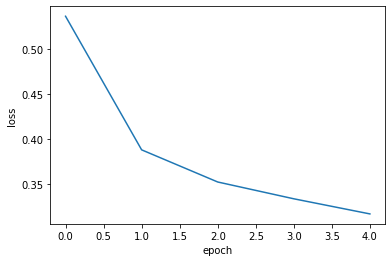

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

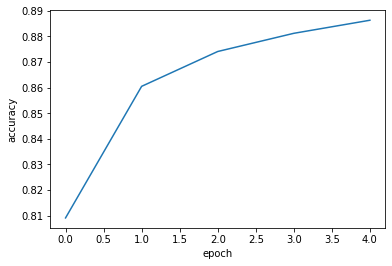

In [36]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

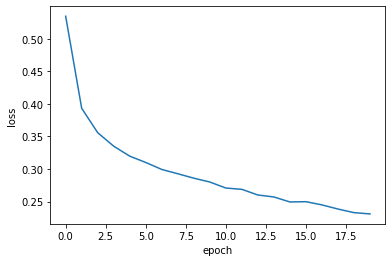

In [38]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [3]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5202 - accuracy: 0.8163 - val_loss: 0.4627 - val_accuracy: 0.8394
Epoch 2/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3873 - accuracy: 0.8625 - val_loss: 0.4026 - val_accuracy: 0.8541
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3504 - accuracy: 0.8747 - val_loss: 0.3568 - val_accuracy: 0.8713
Epoch 4/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3308 - accuracy: 0.8815 - val_loss: 0.3665 - val_accuracy: 0.8726
Epoch 5/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3173 - accuracy: 0.8882 - val_loss: 0.3580 - val_accuracy: 0.8790
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3045 - accuracy: 0.8917 - val_loss: 0.3819 - val_accuracy: 0.8726
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2955 - accuracy: 0.8958 - val_loss: 0.3761 - val_accuracy:

In [4]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


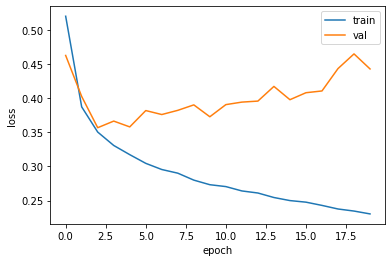

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5197 - accuracy: 0.8197 - val_loss: 0.4177 - val_accuracy: 0.8537
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3905 - accuracy: 0.8595 - val_loss: 0.3771 - val_accuracy: 0.8662
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3508 - accuracy: 0.8718 - val_loss: 0.3489 - val_accuracy: 0.8742
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3247 - accuracy: 0.8808 - val_loss: 0.3594 - val_accuracy: 0.8687
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3062 - accuracy: 0.8867 - val_loss: 0.3429 - val_accuracy: 0.8761
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2924 - accuracy: 0.8930 - val_loss: 0.3251 - val_accuracy: 0.8833
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2773 - accuracy: 0.8982 - val_loss: 0.3368 - val_accuracy:

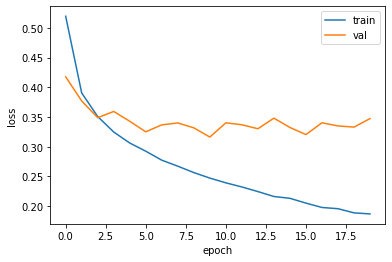

In [7]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [9]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               78500     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


Epoch 1/20
1500/1500 [==============================] - 8s 4ms/step - loss: 0.5917 - accuracy: 0.7925 - val_loss: 0.4529 - val_accuracy: 0.8373
Epoch 2/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4419 - accuracy: 0.8416 - val_loss: 0.3910 - val_accuracy: 0.8581
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.4045 - accuracy: 0.8523 - val_loss: 0.3722 - val_accuracy: 0.8643
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3828 - accuracy: 0.8602 - val_loss: 0.3540 - val_accuracy: 0.8717
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3705 - accuracy: 0.8655 - val_loss: 0.3548 - val_accuracy: 0.8734
Epoch 6/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3553 - accuracy: 0.8705 - val_loss: 0.3482 - val_accuracy: 0.8758
Epoch 7/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3475 - accuracy: 0.8744 - val_loss: 0.3297 - val_accuracy:

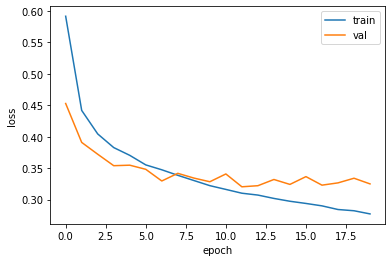

In [10]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [11]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
history = model.fit(train_scaled, train_target, epochs = 10, validation_data = (val_scaled, val_target))

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5941 - accuracy: 0.7923 - val_loss: 0.4248 - val_accuracy: 0.8443
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4416 - accuracy: 0.8414 - val_loss: 0.3838 - val_accuracy: 0.8616
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4051 - accuracy: 0.8521 - val_loss: 0.3770 - val_accuracy: 0.8637
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3838 - accuracy: 0.8606 - val_loss: 0.3619 - val_accuracy: 0.8681
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3655 - accuracy: 0.8684 - val_loss: 0.3539 - val_accuracy: 0.8673
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3530 - accuracy: 0.8715 - val_loss: 0.3389 - val_accuracy: 0.8742
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3424 - accuracy: 0.8736 - val_loss: 0.3317 - val_accuracy:

In [12]:
model.save_weights('model-weights.h5')

In [13]:
model.save('model-whole.h5')

In [15]:
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Mar 11 04:58 model-weights.h5
-rw-r--r-- 1 root root 982664 Mar 11 04:58 model-whole.h5


In [16]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

In [23]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis = -1)
print(np.mean(val_labels == val_target))

0.883


In [24]:
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 3ms/step - loss: 0.3226 - accuracy: 0.8830


[0.322593629360199, 0.8830000162124634]

In [26]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('bets-model.h5', save_best_only = True)
model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5943 - accuracy: 0.7886 - val_loss: 0.4226 - val_accuracy: 0.8453
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4416 - accuracy: 0.8406 - val_loss: 0.3865 - val_accuracy: 0.8603
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4065 - accuracy: 0.8538 - val_loss: 0.3738 - val_accuracy: 0.8629
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3831 - accuracy: 0.8609 - val_loss: 0.3553 - val_accuracy: 0.8687
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3659 - accuracy: 0.8671 - val_loss: 0.3604 - val_accuracy: 0.8667
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3546 - accuracy: 0.8700 - val_loss: 0.3352 - val_accuracy: 0.8781
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3476 - accuracy: 0.8718 - val_loss: 0.3447 - val_accuracy:

In [29]:
model = keras.models.load_model('bets-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 2s 3ms/step - loss: 0.3138 - accuracy: 0.8883


[0.3137660622596741, 0.8883333206176758]

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5', save_best_only = True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5897 - accuracy: 0.7935 - val_loss: 0.4231 - val_accuracy: 0.8490
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8394 - val_loss: 0.3930 - val_accuracy: 0.8572
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4026 - accuracy: 0.8542 - val_loss: 0.3596 - val_accuracy: 0.8698
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3805 - accuracy: 0.8598 - val_loss: 0.3534 - val_accuracy: 0.8728
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3685 - accuracy: 0.8659 - val_loss: 0.3475 - val_accuracy: 0.8717
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3558 - accuracy: 0.8691 - val_loss: 0.3345 - val_accuracy: 0.8787
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3440 - accuracy: 0.8739 - val_loss: 0.3400 - val_accuracy:

In [36]:
print(early_stopping_cb.stopped_epoch)

10


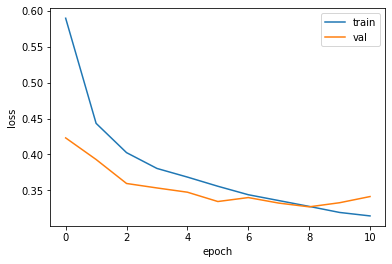

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [38]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 4ms/step - loss: 0.3271 - accuracy: 0.8821


[0.32708755135536194, 0.8820833563804626]